C:\Users\cason\AppData\Local\Temp/ipykernel_20612/1807275939.py:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x,f,color='k',LineWidth=2)
C:\Users\cason\AppData\Local\Temp/ipykernel_20612/1807275939.py:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  fFS_plot, = plt.plot([],[],color='r',LineWidth=2)


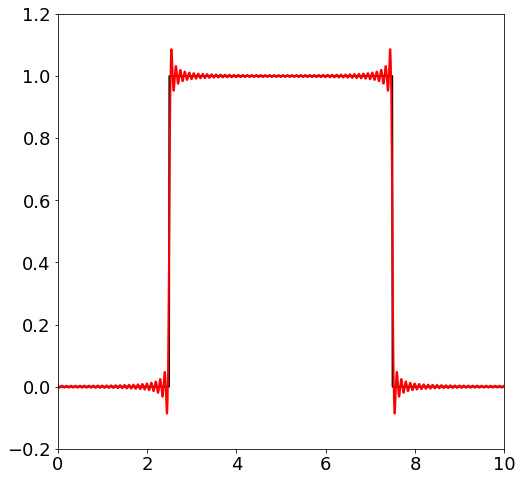

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'


dx = 0.01
L = 10
x = np.arange(0,L+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

f = np.zeros_like(x)
f[nquart:3*nquart] = 1

A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0/2 * np.ones_like(f)

fig,ax = plt.subplots()
plt.plot(x,f,color='k',LineWidth=2)
fFS_plot, = plt.plot([],[],color='r',LineWidth=2)

all_fFS = np.zeros((len(fFS),101))
all_fFS[:,0] = fFS

for k in range(1,101):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFS = fFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)
    all_fFS[:,k] = fFS

def init():
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-0.2, 1.2)
    return fFS

def animate(iter):
    fFS_plot.set_data(x,all_fFS[:,iter])
    return fFS_plot

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=101,interval=50,blit=False,repeat=False)
HTML(anim.to_jshtml())